# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.138605e+01     6.468596e+00
 * time: 0.005070924758911133
     1     2.746939e+01     5.527543e+00
 * time: 0.01452493667602539
     2     2.197070e+01     7.445779e+00
 * time: 0.0372159481048584
     3     1.315891e+01     1.431558e+00
 * time: 0.06481409072875977
     4     1.246278e+01     2.540135e+00
 * time: 0.08356404304504395
     5     1.180008e+01     2.011946e+00
 * time: 0.101776123046875
     6     1.073652e+01     1.545671e+00
 * time: 0.12012910842895508
     7     9.955177e+00     1.941460e+00
 * time: 0.1384739875793457
     8     9.466991e+00     1.318818e+00
 * time: 0.15685296058654785
     9     9.164290e+00     6.827318e-01
 * time: 0.17539000511169434
    10     8.998295e+00     6.506023e-01
 * time: 0.19368910789489746
    11     8.966209e+00     7.589388e-01
 * time: 0.20742511749267578
    12     8.874140e+00     4.949795e-01
 * time: 0.22138094902038574
    13     8.807644e+00     5.284080e-01
 * time: 0.

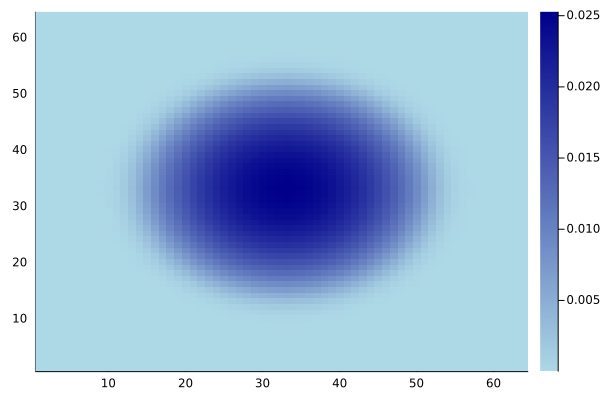

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)